In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_curve,roc_auc_score,f1_score
from sklearn.naive_bayes import GaussianNB

In [2]:
iris=pd.read_csv('iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

<AxesSubplot:>

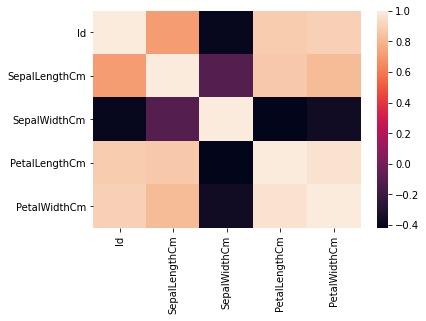

In [5]:
sns.heatmap(iris.corr())

In [6]:
from sklearn import preprocessing
lbl_enc=preprocessing.LabelEncoder()
iris['Species']=lbl_enc.fit_transform(iris['Species'])

In [7]:
y=iris.Species

In [8]:
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [9]:
y.shape

(150,)

In [10]:
X=iris.drop(['Species'],axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(X))

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [14]:
clf_gnb=GaussianNB()
clf_gnb.fit(X_train,y_train)

GaussianNB()

In [15]:
y_pred=clf_gnb.predict(X_test)

In [16]:
print('Training Accuracy:',clf_gnb.score(X_train,y_train))
print('Testing Accuracy:',clf_gnb.score(X_test,y_test))

Training Accuracy: 0.9916666666666667
Testing Accuracy: 1.0


In [17]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 12  0]
 [ 0  0  7]]


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

